In [1]:
import chess
import chess.pgn
import numpy as np
from scipy import sparse
from tensorflow import keras
from time import sleep
from IPython import display
import hedgehog_functions as hf

In [2]:
print(chess.__version__)
print(keras.__version__)

0.24.2
2.1.6-tf


## - Load model

In [3]:
model = keras.models.load_model('model.h5')
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 774)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 774)          0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 300)          1219400     input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 600)          0           sequential[1][0]                 
          

##  - Play a game

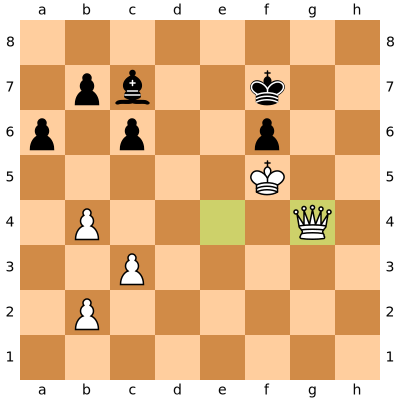

In [5]:
board_final = chess.Board()
display.display(board_final)
sleep(1)
while not board_final.is_game_over(claim_draw=True):
    best_move, board_final = hf.move_to_play(board_final, model, hf.features)
    display.clear_output()
    display.display(board_final)
    sleep(1)

In [6]:
board_final.move_stack

[Move.from_uci('e2e4'),
 Move.from_uci('e7e5'),
 Move.from_uci('g1f3'),
 Move.from_uci('b8c6'),
 Move.from_uci('f1c4'),
 Move.from_uci('f8c5'),
 Move.from_uci('c2c3'),
 Move.from_uci('g8f6'),
 Move.from_uci('d2d3'),
 Move.from_uci('d7d6'),
 Move.from_uci('c4b3'),
 Move.from_uci('e8g8'),
 Move.from_uci('e1g1'),
 Move.from_uci('a7a6'),
 Move.from_uci('b1d2'),
 Move.from_uci('c5a7'),
 Move.from_uci('h2h3'),
 Move.from_uci('h7h6'),
 Move.from_uci('f1e1'),
 Move.from_uci('f8e8'),
 Move.from_uci('d2f1'),
 Move.from_uci('c8e6'),
 Move.from_uci('f1g3'),
 Move.from_uci('e6b3'),
 Move.from_uci('a2b3'),
 Move.from_uci('d6d5'),
 Move.from_uci('e4d5'),
 Move.from_uci('d8d5'),
 Move.from_uci('b3b4'),
 Move.from_uci('a8d8'),
 Move.from_uci('d1e2'),
 Move.from_uci('e5e4'),
 Move.from_uci('d3e4'),
 Move.from_uci('d5b3'),
 Move.from_uci('e4e5'),
 Move.from_uci('c6e5'),
 Move.from_uci('f3e5'),
 Move.from_uci('e8e5'),
 Move.from_uci('e2e5'),
 Move.from_uci('d8d1'),
 Move.from_uci('c1h6'),
 Move.from_uci('

##  - Test

In [4]:
pgn = open("KingBaseLite2018-12.pgn")

In [5]:
games_total = hf.count_games(pgn)
print("Number of games in pgn file is " + str(games_total) + ".")

Number of games in pgn file is 11967.


In [6]:
legal_moves = np.empty(games_total)
plies_played = np.empty(games_total)
score = np.zeros(games_total)

In [8]:
np.random.seed(123)
pgn.seek(0)
n=1000
for i in range(0,n):   
    
    if (i+1)%100==0: print("Positions tested: " + str(i+1))
    
    game = chess.pgn.read_game(pgn)
        
    position_to_play, position_played, position_plies = hf.positions(game)
        
    legal_moves[i] = len(list(position_to_play.legal_moves))
    
    plies_played[i] = position_plies
    
    best_move, position_played_model = hf.move_to_play(position_to_play, model, hf.features)
            
    if position_played == position_played_model: score[i] = 1 
        

Positions tested: 100
Positions tested: 200
Positions tested: 300
Positions tested: 400
Positions tested: 500
Positions tested: 600
Positions tested: 700
Positions tested: 800
Positions tested: 900
Positions tested: 1000


In [9]:
legal_moves = legal_moves[0:n]
plies_played = plies_played[0:n]
score = score[0:n]

In [19]:
print("Model acc is {:2.2%}.".format(np.mean(score)))
print("Average number of legal moves in tested positions is {0:0.2f}.".format(np.mean(legal_moves)))
print("Average number of plies played in tested positions is {0:0.2f}.".format(np.mean(plies_played)))

Model-one acc is 33.70%.
Model-all acc is 34.10%.
Average number of legal moves in tested positions is 31.36.
Average number of plies played in tested positions is 47.07.
